<a href="https://colab.research.google.com/github/HarryWallrus/CHEG_672_final_biochar/blob/main/Wallace_CHEG672_final_Biochar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.3 MB/s eta 0:00:00


In [2]:
!pip install scikit-learn

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import shap
from skopt import BayesSearchCV, gp_minimize
from skopt.space import Real, Integer
import math
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
import joblib
import plotly.graph_objects as go

# Exploratory Data Analysis (EDA)
---

## Data Loading
---

In [9]:
# Replace '/path/to/your/file.xlsx' with the actual file path
file_path = '/content/Dataset_1.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

# Print the first few rows of the DataFrame to verify
print(df.head())

          Unnamed: 0                                 Unnamed: 1  \
0                NaN                                INPUTS (10)   
1  Type of Feedstock  Feedstock Proximate analysis (vol. % db.)   
2                NaN                             Fixed_carbon_1   
3            Corncob                                  18.006795   
4            Corncob                                  18.006795   

          Unnamed: 2 Unnamed: 3                                Unnamed: 4  \
0                NaN        NaN                                       NaN   
1                NaN        NaN  Feedstock Ultimate analysis (vol. % db.)   
2  Volatile_matter_1      Ash_1                                       C_1   
3          78.708947   3.284258                                     48.12   
4          78.708947   3.284258                                     48.12   

  Unnamed: 5 Unnamed: 6 Unnamed: 7            Unnamed: 8        Unnamed: 9  \
0        NaN        NaN        NaN                   NaN

In [10]:
# Get the number of rows and columns in the DataFrame
num_rows, num_cols = df.shape

# Print the results
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 229
Number of columns: 19


If you need to drop the first column of a dataset:

In [12]:
# Remove the first column of the dataset
# df = df.iloc[:, 1:]

# Display the first few rows to confirm the column is removed
df.head()

,Unnamed: 0,Fixed_carbon_1,Volatile_matter_1,Ash_1,C_1,H_1,O_1,N_1,Residence time (min),Temperature (°C),Heating rate (°C/min),Biochar yield (%),Fixed_Carbon_2,Volatile_matter_2,Ash_2,C_2,H_2,O_2,N_2
0,Corncob,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,30,400,15,30.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Corncob,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,60,400,10,26.60,73.237998,21.246170,5.515832,79.65,3.96,15.72,0.67
2,Corncob,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,90,400,5,26.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Corncob,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,30,500,15,23.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Corncob,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,60,500,10,25.32,82.926829,8.739837,8.333333,83.27,3.33,12.62,0.78


If you need to remove merged, topmost headers:

In [11]:
# Assuming you have a DataFrame named 'df'
df = pd.read_excel("Dataset_1.xlsx", header=3)  # Skip the first [3] rows

print(df)

         Unnamed: 0  Fixed_carbon_1  Volatile_matter_1     Ash_1    C_1   H_1  \
0           Corncob       18.006795          78.708947  3.284258  48.12  6.48   
1           Corncob       18.006795          78.708947  3.284258  48.12  6.48   
2           Corncob       18.006795          78.708947  3.284258  48.12  6.48   
3           Corncob       18.006795          78.708947  3.284258  48.12  6.48   
4           Corncob       18.006795          78.708947  3.284258  48.12  6.48   
..              ...             ...                ...       ...    ...   ...   
221  Poultry litter       23.500000          68.300000  8.200000  35.70  5.27   
222  hinoki cypress       15.090000          84.750000  0.160000  51.88  6.21   
223  hinoki cypress       15.090000          84.750000  0.160000  51.88  6.21   
224  hinoki cypress       15.090000          84.750000  0.160000  51.88  6.21   
225  hinoki cypress       15.090000          84.750000  0.160000  51.88  6.21   

       O_1   N_1  Residence

In [14]:
# Get the number of rows and columns in the DataFrame
num_rows, num_cols = df.shape

# Print the results
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 226
Number of columns: 19


## Check for Missing or Duplicate Data
---

Check for missing data and displaying the number of missing values for each column (if any).

In [13]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing data
print("Columns with missing values:\n")
print(missing_values[missing_values > 0])

Columns with missing values:

O_1                  16
Fixed_Carbon_2       67
Volatile_matter_2    67
Ash_2                67
C_2                  64
H_2                  76
O_2                  76
N_2                  64
dtype: int64


If replacing missing data in a column with the mean of the column's values, use the following:

In [20]:
# Example of imputing missing values with the mean

# Select numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Replace missing values with column means (numeric columns only)
df_filled = df_numeric.fillna(df_numeric.mean())

print("\nDataFrame after filling missing values (numeric columns):\n")
print(df_filled)


DataFrame after filling missing values (numeric columns):

     Fixed_carbon_1  Volatile_matter_1     Ash_1    C_1   H_1    O_1   N_1  \
0         18.006795          78.708947  3.284258  48.12  6.48  43.51  1.89   
1         18.006795          78.708947  3.284258  48.12  6.48  43.51  1.89   
2         18.006795          78.708947  3.284258  48.12  6.48  43.51  1.89   
3         18.006795          78.708947  3.284258  48.12  6.48  43.51  1.89   
4         18.006795          78.708947  3.284258  48.12  6.48  43.51  1.89   
..              ...                ...       ...    ...   ...    ...   ...   
221       23.500000          68.300000  8.200000  35.70  5.27  40.98  9.61   
222       15.090000          84.750000  0.160000  51.88  6.21  41.76  0.16   
223       15.090000          84.750000  0.160000  51.88  6.21  41.76  0.16   
224       15.090000          84.750000  0.160000  51.88  6.21  41.76  0.16   
225       15.090000          84.750000  0.160000  51.88  6.21  41.76  0.16   

   

Rechecking that missing data has been resolved:

In [21]:
# Check for missing values
missing_values = df.isnull().sum()


# Display columns with missing data
print("Columns with missing values:\n")
print(missing_values[missing_values > 0])

Columns with missing values:

Series([], dtype: int64)


Identify any duplicate rows in the data and drop them, if any:

In [23]:
# Check for duplicate rows before removal
num_duplicates_before = df.duplicated().sum()
print("Number of duplicate rows before removal:", num_duplicates_before)

# Remove duplicate rows
df = df.drop_duplicates()

# Check if duplicates were removed successfully
num_duplicates_after = df.duplicated().sum()
print("Number of duplicate rows after removal:", num_duplicates_after)

# Print the final DataFrame
print(df)

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0
         Unnamed: 0  Fixed_carbon_1  Volatile_matter_1     Ash_1    C_1   H_1  \
0           Corncob       18.006795          78.708947  3.284258  48.12  6.48   
1           Corncob       18.006795          78.708947  3.284258  48.12  6.48   
2           Corncob       18.006795          78.708947  3.284258  48.12  6.48   
3           Corncob       18.006795          78.708947  3.284258  48.12  6.48   
4           Corncob       18.006795          78.708947  3.284258  48.12  6.48   
..              ...             ...                ...       ...    ...   ...   
221  Poultry litter       23.500000          68.300000  8.200000  35.70  5.27   
222  hinoki cypress       15.090000          84.750000  0.160000  51.88  6.21   
223  hinoki cypress       15.090000          84.750000  0.160000  51.88  6.21   
224  hinoki cypress       15.090000          84.750000  0.160000  51.88  6.21   
225  hinoki cypress     

## Handling Outliers
---

Visualize the dataset with box plots to check for outliers in the numeric columns.

In [ ]:
# Plotting a boxplot for a specific numeric column
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Fixed_Carbon_1'], color='cyan')
plt.title('Fixed_Carbon_1')
plt.xlabel('vol % (db)')
plt.show()

Outliers can be identified from the dataset by targeting values that fall outside the whiskers of each boxplot, or by using Z-scoring to identify outliers outside of a threshhold based on a multiple of the standard deviation.

In this specific dataset, the numeric columns are the component percentages (features) and the component outputs (target). The component percentages of a row together make up a given feed composition, so I believe their data should remain unchanged.

## Summary Statistics
---



In [24]:
# Display summary statistics
summary_statistics = df.describe()
print(summary_statistics)

       Fixed_carbon_1  Volatile_matter_1       Ash_1         C_1        H_1  \
count      226.000000         226.000000  226.000000  226.000000  226.00000   
mean        13.842965          79.828759    6.328276   44.189115    5.93646   
std          5.360883           4.911013    3.942017    5.437395    0.99575   
min          4.329004          68.200000    0.160000   35.700000    4.10000   
25%         10.060000          76.860000    2.834310   40.815000    5.50000   
50%         12.804143          80.850000    6.605415   43.570000    5.81000   
75%         17.140000          82.748599    8.695000   47.660000    6.21000   
max         27.800000          91.160000   15.141514   64.230000   10.18000   

              O_1         N_1  Residence time (min)  Temperature (°C)  \
count  226.000000  226.000000            226.000000        226.000000   
mean    42.443143    1.297345             38.084071        460.663717   
std      5.010448    1.656366             18.763724        124.821658

In [25]:
# Get the data types of each column
data_types = df.dtypes

# Print the results
print("Data types:\n")
print(data_types)

# Identify numeric columns (integer and float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (object)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("\nNumeric columns:", numeric_columns)
print("\nCategorical columns:", categorical_columns)

Data types:

Unnamed: 0                object
Fixed_carbon_1           float64
Volatile_matter_1        float64
Ash_1                    float64
C_1                      float64
H_1                      float64
O_1                      float64
N_1                      float64
Residence time (min)       int64
Temperature (°C)           int64
Heating rate (°C/min)      int64
Biochar yield (%)        float64
Fixed_Carbon_2           float64
Volatile_matter_2        float64
Ash_2                    float64
C_2                      float64
H_2                      float64
O_2                      float64
N_2                      float64
dtype: object

Numeric columns: ['Fixed_carbon_1', 'Volatile_matter_1', 'Ash_1', 'C_1', 'H_1', 'O_1', 'N_1', 'Residence time (min)', 'Temperature (°C)', 'Heating rate (°C/min)', 'Biochar yield (%)', 'Fixed_Carbon_2', 'Volatile_matter_2', 'Ash_2', 'C_2', 'H_2', 'O_2', 'N_2']

Categorical columns: ['Unnamed: 0']


Apply one-hot encoding to convert the categorical variables into numerical format (one-hot makes encoded columns in a binary true/false manner).

In [26]:
# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the encoded dataset
df_encoded.head()

,Fixed_carbon_1,Volatile_matter_1,Ash_1,C_1,H_1,O_1,N_1,Residence time (min),Temperature (°C),Heating rate (°C/min),...,Unnamed: 0_Rape stalk,Unnamed: 0_Rapeseed oil cake,Unnamed: 0_Rice Straw,Unnamed: 0_Rice husk,Unnamed: 0_Straw pallet,Unnamed: 0_Vine pruning,Unnamed: 0_Wheat straw,Unnamed: 0_Wood bark,Unnamed: 0_Wood stem,Unnamed: 0_hinoki cypress
0,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,30,400,15,...,False,False,False,False,False,False,False,False,False,False
1,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,60,400,10,...,False,False,False,False,False,False,False,False,False,False
2,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,90,400,5,...,False,False,False,False,False,False,False,False,False,False
3,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,30,500,15,...,False,False,False,False,False,False,False,False,False,False
4,18.006795,78.708947,3.284258,48.12,6.48,43.51,1.89,60,500,10,...,False,False,False,False,False,False,False,False,False,False


If checking for duplicate columns, use something like this:

In [27]:
# Assuming your data is in a DataFrame named 'df'
duplicate_columns = df.columns[df.columns.duplicated()]

# To view the duplicate columns
print(duplicate_columns)

Index([], dtype='object')


## Correlation and Heatmaps
---

Generate a correlation matrix and a heat map to examine correlations between numeric variables in the dataset.

In [30]:
# Split the Data into X (features) and y (targets):
# Assuming your DataFrame is named 'df'

# Define feature and target column names
feature_cols = ['Fixed_carbon_1', 'Volatile_matter_1', 'Ash_1', 'C_1', 'H_1', 'O_1', 'N_1',
                'Residence time (min)', 'Temperature (°C)', 'Heating rate (°C/min)']
target_cols = ['Biochar yield (%)', 'Fixed_Carbon_2', 'Volatile_matter_2', 'Ash_2', 'C_2', 'H_2', 'O_2', 'N_2']

# Split the Data into X (features) and y (targets)
X = df[feature_cols]
y = df[target_cols]

# Display the first few rows of X and y
print("Features (X):\n", X.head())
print("\nTargets (y):\n", y.head())

Features (X):
    Fixed_carbon_1  Volatile_matter_1     Ash_1    C_1   H_1    O_1   N_1  \
0       18.006795          78.708947  3.284258  48.12  6.48  43.51  1.89   
1       18.006795          78.708947  3.284258  48.12  6.48  43.51  1.89   
2       18.006795          78.708947  3.284258  48.12  6.48  43.51  1.89   
3       18.006795          78.708947  3.284258  48.12  6.48  43.51  1.89   
4       18.006795          78.708947  3.284258  48.12  6.48  43.51  1.89   

   Residence time (min)  Temperature (°C)  Heating rate (°C/min)  
0                    30               400                     15  
1                    60               400                     10  
2                    90               400                      5  
3                    30               500                     15  
4                    60               500                     10  

Targets (y):
    Biochar yield (%)  Fixed_Carbon_2  Volatile_matter_2      Ash_2        C_2  \
0              30.80       53.

In [31]:
# Assuming df_encoded is your dataset after one-hot encoding
encoded_columns = [col for col in df_encoded.columns if col not in df.columns]

# Print encoded columns to verify
print("One-hot encoded columns:")
print(encoded_columns)

One-hot encoded columns:
['Unnamed: 0_Agro food waste ', 'Unnamed: 0_Agro-food waste ', 'Unnamed: 0_Bagasse', 'Unnamed: 0_Bamboo ', 'Unnamed: 0_Canola hull', 'Unnamed: 0_Cassava rhizome', 'Unnamed: 0_Cassava stem', 'Unnamed: 0_Coconut fiber', 'Unnamed: 0_Coconut shell', 'Unnamed: 0_Cocopeat', 'Unnamed: 0_Corn stover', 'Unnamed: 0_Corncob', 'Unnamed: 0_Cotton stalk', 'Unnamed: 0_Oat hull', 'Unnamed: 0_Orange Bagasse', 'Unnamed: 0_Orange pomace', 'Unnamed: 0_Palm kernel shell', 'Unnamed: 0_Pine', 'Unnamed: 0_Pine wood', 'Unnamed: 0_Pinewood sawdust ', 'Unnamed: 0_Poultry litter', 'Unnamed: 0_Rape stalk ', 'Unnamed: 0_Rapeseed oil cake', 'Unnamed: 0_Rice Straw', 'Unnamed: 0_Rice husk', 'Unnamed: 0_Straw pallet ', 'Unnamed: 0_Vine pruning', 'Unnamed: 0_Wheat straw', 'Unnamed: 0_Wood bark', 'Unnamed: 0_Wood stem', 'Unnamed: 0_hinoki cypress']


In [32]:
# Exclude one-hot encoded columns from the dataset
df_no_encoding = df_encoded.drop(columns=encoded_columns)

# Alternatively, if you have the original dataframe before encoding, just use df

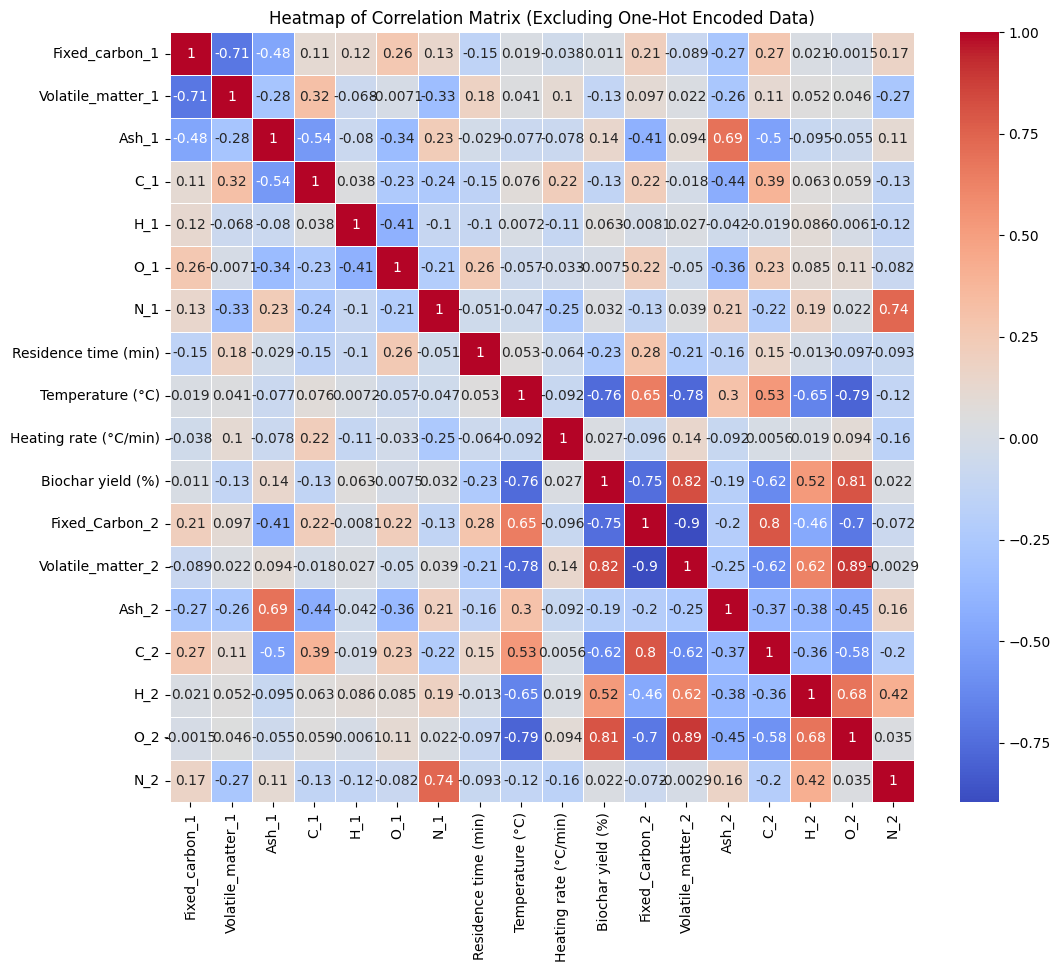

In [33]:
# Plot a heatmap excluding the one-hot encoded columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_no_encoding.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix (Excluding One-Hot Encoded Data)')
plt.show()

## Visualizing Data Relationships
---

To make a scatterplot (and correlation coefficient):

In [ ]:
# Calculate the correlation coefficient
correlation = df["Feature_column"].corr(df["Target_column"])

# Print the correlation coefficient
print("Feature_name and Target_name:", correlation)

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Feature_column", y="Target_column", data=df)
plt.title("Scatter Plot of Feature_name vs. Target_name")
plt.xlabel("Feature_name")
plt.ylabel("Target_name")
plt.show()

To make a histogram:

In [ ]:
import matplotlib.pyplot as plt

# Plotting a histogram for a specific numeric column
# Change 'your_numeric_column' to the name of the column you wish to plot a histogram for
plt.figure(figsize=(8, 6))
plt.hist(df['Column_1'], bins=30, alpha=0.7, color='blue')
plt.title('Column_1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

To make a pairplot:

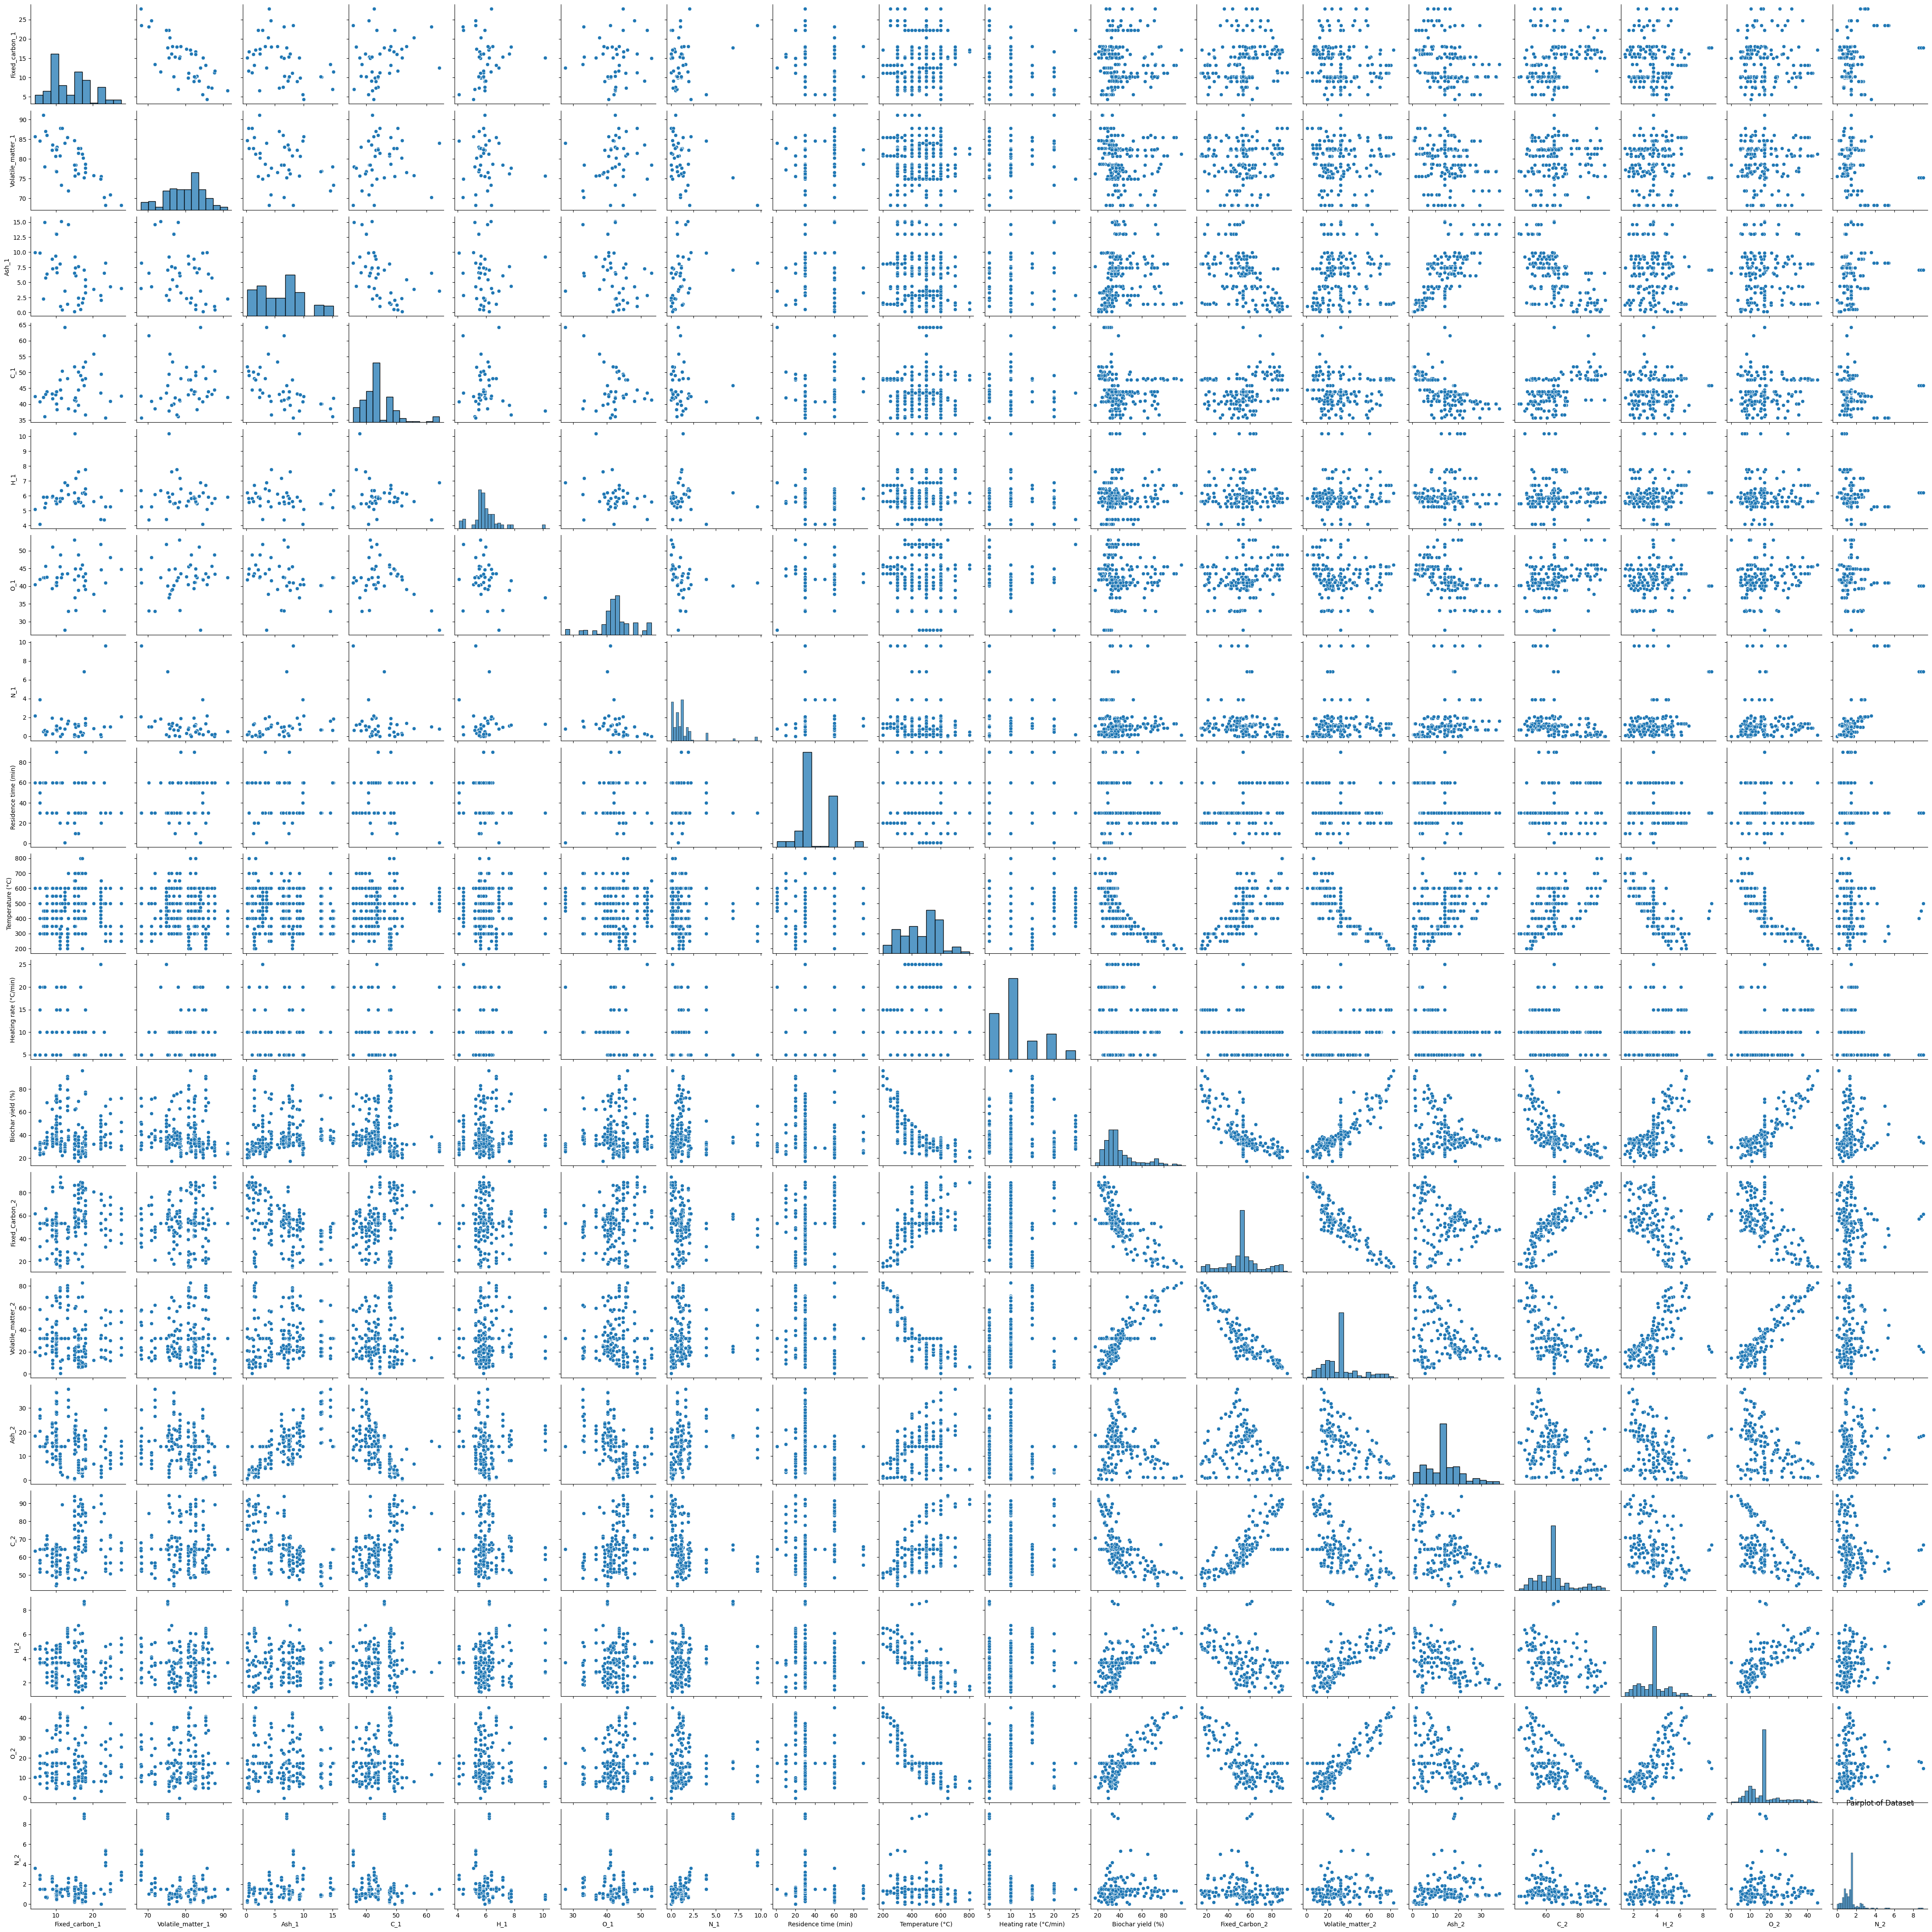

In [34]:
# Plot a pairplot to visualize relationships between variables
sns.pairplot(df)
plt.title('Pairplot of Dataset')
plt.show()

## Dealing with Multicollinearity
---

If there are feature pairs with high correlation coefficients, try dropping the worst offenders and check if that reduces any distortion in the model.

(Likely a safer choice if you're dropping variables with low direct correlation to the target(s).)

Use the following code to drop columns, and then remake the heatmap and correlation visuals to check if it helped or repeat again as needed:

In [ ]:
# Identify numeric columns (integer and float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (object)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("\nNumeric columns:", numeric_columns)
print("\nCategorical columns:", categorical_columns)

In [ ]:
df.drop("Feature_column_1", axis=1, inplace=True)

# Check if the column has been deleted
if "Feature_column_1" not in df.columns:
    print("Column 'Feature_column_1' has been deleted successfully.")
else:
    print("Column 'Feature_column_1' still exists.")

# Machine Learning
---

In [42]:
print(y.shape)

(226, 8)


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Define feature and target columns
feature_cols = ['Fixed_carbon_1', 'Volatile_matter_1', 'Ash_1', 'C_1', 'H_1', 'O_1', 'N_1',
                'Residence time (min)', 'Temperature (°C)', 'Heating rate (°C/min)']
target_col = 'Biochar yield (%)'  # Select the target column



# Split data into features (X) and target (y)
X = df[feature_cols]
y = df[target_col]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X = X_train, y = y_train)

LinearRegression()

In [48]:
print('β1 = ' + str(linear_regression.coef_) + ', β0 = ' + str(linear_regression.intercept_))

β1 = [ 2.13341548e+07  2.13341547e+07  2.13341547e+07 -3.51665192e-01
  9.66005534e-03 -1.40392980e-01 -8.39619994e-01 -1.61801223e-01
 -9.38736871e-02 -1.24200093e-01], β0 = -2133415358.96553


In [49]:
from sklearn.metrics import r2_score
y_pred_test = linear_regression.predict(X_test)
y_pred_train = linear_regression.predict(X_train)

print('R2 train = ', r2_score(y_train, y_pred_train))
print('R2 test = ', r2_score(y_test, y_pred_test))


R2 train =  0.6427814335367591
R2 test =  0.5504305425331981


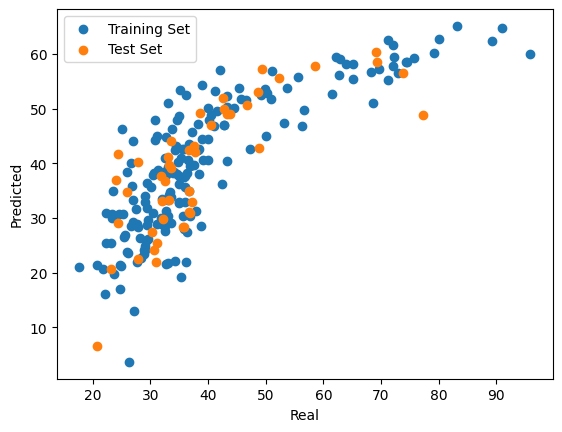

In [50]:
plt.scatter(y_train,y_pred_train, label='Training Set')
plt.scatter(y_test,y_pred_test, label='Test Set')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.legend()
plt.show()


In [51]:
from sklearn.linear_model import LinearRegression

multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X = X_train, y = y_train)

LinearRegression()

In [52]:
from sklearn.metrics import r2_score

pred_train_lr = multiple_linear_regression.predict(X_train)
pred_test_lr = multiple_linear_regression.predict(X_test)

print('R2 training = ', r2_score(y_train, pred_train_lr))
print('R2 test = ', r2_score(y_test, pred_test_lr))

R2 training =  0.6427814335367591
R2 test =  0.5504305425331981


In [53]:
from sklearn.metrics import mean_squared_error
rmse_test = np.sqrt(mean_squared_error(y_test,pred_test_lr))
print('RSME test= ', rmse_test)

RSME test=  8.748885520358815


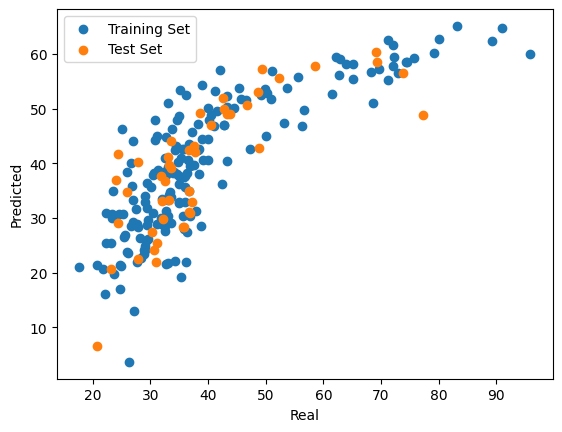

In [54]:
plt.scatter(y_train,pred_train_lr, label='Training Set')
plt.scatter(y_test,pred_test_lr, label='Test Set')

plt.xlabel('Real')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [55]:
coefficients = pd.DataFrame(multiple_linear_regression.coef_,X.columns.tolist())
coefficients.columns = ['Coefficients']
print(coefficients)

                       Coefficients
Fixed_carbon_1         2.133415e+07
Volatile_matter_1      2.133415e+07
Ash_1                  2.133415e+07
C_1                   -3.516652e-01
H_1                    9.660055e-03
O_1                   -1.403930e-01
N_1                   -8.396200e-01
Residence time (min)  -1.618012e-01
Temperature (°C)      -9.387369e-02
Heating rate (°C/min) -1.242001e-01


In [56]:
# Define feature and target columns (replace with your actual column names)
feature_cols = ['Fixed_carbon_1', 'Volatile_matter_1', 'Ash_1', 'C_1', 'H_1', 'O_1', 'N_1',
                'Residence time (min)', 'Temperature (°C)', 'Heating rate (°C/min)']
target_col = 'Biochar yield (%)'  # Target column



# Select features (X) and target (Y)
X = df[feature_cols]
Y = df[target_col]

# Select only numerical columns for features (excluding 'object' type)
X = X.select_dtypes(exclude=['object'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'SGD': SGDRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'MLP': MLPRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(),
    'Linear Regression': LinearRegression(),
    'Extra Trees': ExtraTreesRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} Mean Squared Error: {mse:.3f}, R² Score: {r2:.3f}, MAE: {mae:.3f}")
    print(' ')

SGD Mean Squared Error: 68315579416555030131414925312.000, R² Score: -401246343077419283474546688.000, MAE: 255424434106900.656
 
Random Forest Mean Squared Error: 26.336, R² Score: 0.845, MAE: 3.157
 
Gradient Boosting Mean Squared Error: 27.890, R² Score: 0.836, MAE: 3.006
 
AdaBoost Mean Squared Error: 33.470, R² Score: 0.803, MAE: 3.966
 
Decision Tree Mean Squared Error: 31.625, R² Score: 0.814, MAE: 3.796
 


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Mean Squared Error: 50.823, R² Score: 0.701, MAE: 5.341
 
SVR Mean Squared Error: 95.646, R² Score: 0.438, MAE: 6.387
 
XGBoost Mean Squared Error: 28.045, R² Score: 0.835, MAE: 3.103
 
Linear Regression Mean Squared Error: 76.543, R² Score: 0.550, MAE: 7.206
 
Extra Trees Mean Squared Error: 24.758, R² Score: 0.855, MAE: 3.125
 


In [57]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'SGD': SGDRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'MLP': MLPRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(),
    'Linear Regression': LinearRegression(),
    'Extra Trees': ExtraTreesRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train with scaled data
    y_pred = model.predict(X_test_scaled)  # Predict with scaled test data
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} Mean Squared Error: {mse:.3f}, R² Score: {r2:.3f}, MAE: {mae:.3f}")
    print(' ')


SGD Mean Squared Error: 75.894, R² Score: 0.554, MAE: 7.187
 
Random Forest Mean Squared Error: 25.008, R² Score: 0.853, MAE: 3.039
 
Gradient Boosting Mean Squared Error: 26.646, R² Score: 0.843, MAE: 2.971
 
AdaBoost Mean Squared Error: 32.167, R² Score: 0.811, MAE: 4.088
 
Decision Tree Mean Squared Error: 30.041, R² Score: 0.824, MAE: 3.703
 


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Mean Squared Error: 870.222, R² Score: -4.111, MAE: 26.399
 
SVR Mean Squared Error: 115.099, R² Score: 0.324, MAE: 6.542
 
XGBoost Mean Squared Error: 28.045, R² Score: 0.835, MAE: 3.103
 
Linear Regression Mean Squared Error: 76.543, R² Score: 0.550, MAE: 7.206
 
Extra Trees Mean Squared Error: 25.630, R² Score: 0.849, MAE: 3.166
 


In [59]:
# Get the data types of each column
data_types = df.dtypes

# Print the results
print("Data types:\n")
print(data_types)

# Identify numeric columns (integer and float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (object)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("\nNumeric columns:", numeric_columns)
print("\nCategorical columns:", categorical_columns)

Data types:

Unnamed: 0                object
Fixed_carbon_1           float64
Volatile_matter_1        float64
Ash_1                    float64
C_1                      float64
H_1                      float64
O_1                      float64
N_1                      float64
Residence time (min)       int64
Temperature (°C)           int64
Heating rate (°C/min)      int64
Biochar yield (%)        float64
Fixed_Carbon_2           float64
Volatile_matter_2        float64
Ash_2                    float64
C_2                      float64
H_2                      float64
O_2                      float64
N_2                      float64
dtype: object

Numeric columns: ['Fixed_carbon_1', 'Volatile_matter_1', 'Ash_1', 'C_1', 'H_1', 'O_1', 'N_1', 'Residence time (min)', 'Temperature (°C)', 'Heating rate (°C/min)', 'Biochar yield (%)', 'Fixed_Carbon_2', 'Volatile_matter_2', 'Ash_2', 'C_2', 'H_2', 'O_2', 'N_2']

Categorical columns: ['Unnamed: 0']


In [60]:
# Apply one-hot encoding to specific columns
encoded_df = pd.get_dummies(df, columns=['Unnamed: 0'])
x = encoded_df.drop('Biochar yield (%)',axis=1)
y = encoded_df['Biochar yield (%)']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Initialize models
models = {
    'SGD': SGDRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'MLP': MLPRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(),
    'Linear Regression': LinearRegression(),
    'Extra Trees': ExtraTreesRegressor()
}

# Train and evaluate each model
selected_models = []
for name, model in models.items():
    model.fit(X_train, y_train)  # Train with scaled data
    y_pred = model.predict(X_test)  # Predict with scaled test data
    r2 = r2_score(y_test, y_pred)
    if r2 > 0.90:
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"{name} R² Score: {r2:.3f}, Mean Squared Error: {mse:.3f}, MAE: {mae:.3f}")
        print(' ')
        selected_models.append((name, model))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Decision tree seems best, based on comparing the MAE, R^2, and RMSE values.

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt



# Define feature and target columns (replace with your actual column names)
feature_cols = ['Fixed_carbon_1', 'Volatile_matter_1', 'Ash_1', 'C_1', 'H_1', 'O_1', 'N_1',
                'Residence time (min)', 'Temperature (°C)', 'Heating rate (°C/min)']
target_col = 'Biochar yield (wt%)'  # Target column

# Select features (X) and target (y)
X = df[feature_cols]
y = df[target_col]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model (or your preferred model)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Select the feature for the PDP
feature_name = 'Temperature (°C)'  # Replace with the desired feature name

# Create the Partial Dependence Plot
fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=['Temperature (°C)'],
    feature_names=X_train.columns,
    grid_resolution=50,  # Adjust grid resolution as needed
    ax=ax
)

plt.title(f"Partial Dependence Plot for Temperature")
plt.xlabel('Temperature (°C)')
plt.ylabel("Predicted Target")
plt.show()

KeyError: 'Biochar yield (wt%)'